In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Generating Ages

In [2]:
# Choose a mean,standard deviation, and number of samples

def create_ages(mu=50,sigma=13,num_samples=100,seed=42):

    # Set a random seed in the same cell as the random call to get the same values as us
    # We set seed to 42 (42 is an arbitrary choice from Hitchhiker's Guide to the Galaxy)
    np.random.seed(seed)

    sample_ages = np.random.normal(loc=mu,scale=sigma,size=num_samples)
    sample_ages = np.round(sample_ages,decimals=0)
    
    return sample_ages

In [3]:
sample = create_ages()

In [4]:
sample

array([56., 48., 58., 70., 47., 47., 71., 60., 44., 57., 44., 44., 53.,
       25., 28., 43., 37., 54., 38., 32., 69., 47., 51., 31., 43., 51.,
       35., 55., 42., 46., 42., 74., 50., 36., 61., 34., 53., 25., 33.,
       53., 60., 52., 48., 46., 31., 41., 44., 64., 54., 27., 54., 45.,
       41., 58., 63., 62., 39., 46., 54., 63., 44., 48., 36., 34., 61.,
       68., 49., 63., 55., 42., 55., 70., 50., 70., 16., 61., 51., 46.,
       51., 24., 47., 55., 69., 43., 39., 43., 62., 54., 43., 57., 51.,
       63., 41., 46., 45., 31., 54., 53., 50., 47.])

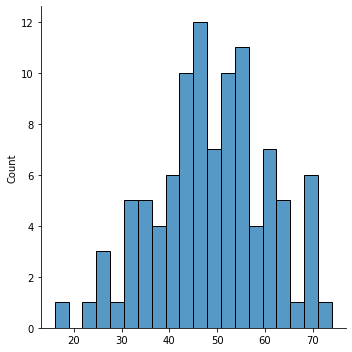

In [5]:
sns.displot(sample, bins=20)

C:\Users\Guilherme\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

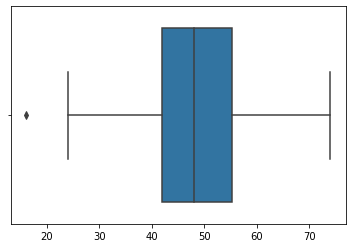

In [6]:
sns.boxplot(sample)

In [7]:
ser = pd.Series(sample)
ser

0     56.0
1     48.0
2     58.0
3     70.0
4     47.0
      ... 
95    31.0
96    54.0
97    53.0
98    50.0
99    47.0
Length: 100, dtype: float64

In [8]:
ser.describe()

count    100.00000
mean      48.66000
std       11.82039
min       16.00000
25%       42.00000
50%       48.00000
75%       55.25000
max       74.00000
dtype: float64

In [9]:
IQR = 55.25 - 42.00
lower_bound = 42 - 1.5*IQR
print(f' Lower Age: {lower_bound}')
upper_bound = 55.25 + 1.5*IQR
print(f' Higher Age: {upper_bound}')

 Lower Age: 22.125
 Higher Age: 75.125


In [10]:
print(f'Idade mínima da amostra: {ser.min()}')
print(f'Idade máxima da amostra: {ser.max()}')

Idade mínima da amostra: 16.0
Idade máxima da amostra: 74.0


In [11]:
ser.sort_values()

74    16.0
79    24.0
37    25.0
13    25.0
49    27.0
      ... 
71    70.0
3     70.0
73    70.0
6     71.0
31    74.0
Length: 100, dtype: float64

In [12]:
# Another way to do that
Q25,Q75 = np.percentile(sample,[25,75])

In [13]:
Q25

42.0

In [14]:
Q75

55.25

In [15]:
Inter_Quartile = Q75-Q25
Inter_Quartile

13.25

In [16]:
low = Q25 - 1.5*Inter_Quartile
low

22.125

In [17]:
upper = Q75 + 1.5*Inter_Quartile
upper

75.125

# Ames Data Set

In [18]:
df = pd.read_csv('../DATA/Ames_Housing_Data.csv')
df

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


# Analysing and Dealing with Outliers

In [19]:
df.corr()['SalePrice'].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

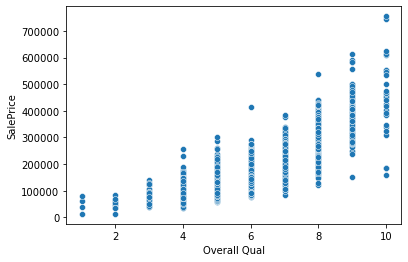

In [20]:
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df);  # In this case the outliers are that dots who aren't following the trend
                                                          # at the inferior right side of the plot

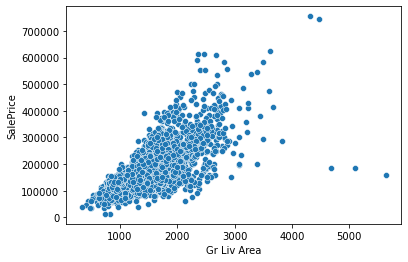

In [21]:
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df); # In this case the outliers are that dots who aren't following the trend
                                                        # at the inferior right side of the plot

In [22]:
# If I want to find the Best house to invest
df[['Overall Qual','Gr Liv Area','SalePrice']].sort_values(by=['Overall Qual','Gr Liv Area','SalePrice'],ascending=[False,False,True])

,Overall Qual,Gr Liv Area,SalePrice
1498,10,5642,160000
2180,10,5095,183850
2181,10,4676,184750
1760,10,4476,745000
1767,10,4316,755000
...,...,...,...
1302,2,407,46500
2903,1,1600,81500
765,1,904,61000
1553,1,733,13100


In [23]:
# Finding the outliers seen in the plots above
df[['Overall Qual','Gr Liv Area','SalePrice']][(df['Gr Liv Area']>4000) & (df['SalePrice']<300000)]

,Overall Qual,Gr Liv Area,SalePrice
1498,10,5642,160000
2180,10,5095,183850
2181,10,4676,184750


In [24]:
# Grabbing the outliers index
drop_index = df[['Overall Qual','Gr Liv Area','SalePrice']][(df['Gr Liv Area']>4000) & (df['SalePrice']<300000)].index
df.drop(index = drop_index, axis = 0, inplace=True)
df

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


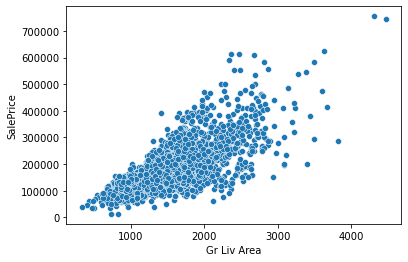

In [25]:
# Checking the drops
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df);

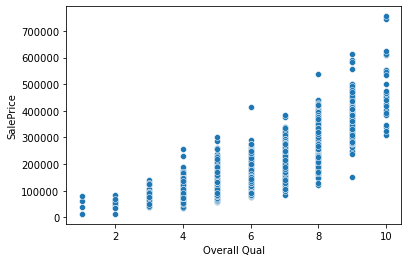

In [26]:
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df);

In [27]:
q25,q75 = np.percentile(df['SalePrice'], [25,75])
iqr = q75-q25
lower_bound = q25 - 1.5*iqr
upper_bound = q75 + 1.5*iqr

In [28]:
df[(df['SalePrice'] > lower_bound) & (df['SalePrice'] < upper_bound)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [29]:
# Percentage of outliers
(len(df) - len(df[(df['SalePrice'] > lower_bound) & (df['SalePrice'] < upper_bound)])) / len(df) * 100

4.6805603006491285

In [30]:
# Creating a new CSV file with the cleared rows
# df.to_csv('../DATA/Ames_outliers_removed_Guilherme')

# Searching for Missing Data

In [31]:
# Reading the description of each column
with open('../DATA/Ames_Housing_Feature_Description.txt', 'r') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [32]:
# Checking Dtypes and number of rows and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2927 non-null   int64  
 1   MS SubClass      2927 non-null   int64  
 2   MS Zoning        2927 non-null   object 
 3   Lot Frontage     2437 non-null   float64
 4   Lot Area         2927 non-null   int64  
 5   Street           2927 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2927 non-null   object 
 8   Land Contour     2927 non-null   object 
 9   Utilities        2927 non-null   object 
 10  Lot Config       2927 non-null   object 
 11  Land Slope       2927 non-null   object 
 12  Neighborhood     2927 non-null   object 
 13  Condition 1      2927 non-null   object 
 14  Condition 2      2927 non-null   object 
 15  Bldg Type        2927 non-null   object 
 16  House Style      2927 non-null   object 
 17  Overall Qual  

In [33]:
# Dropping ID column
df.drop('PID', axis=1,inplace=True)

In [34]:
# Cheking if it was dropped
df.shape

(2927, 80)

In [35]:
# Showing the percentage of missing values
100 * df.isnull().sum().sort_values(ascending=False).head(27) / len(df)

Pool QC           99.590024
Misc Feature      96.412709
Alley             93.235395
Fence             80.457807
Fireplace Qu      48.582166
Lot Frontage      16.740690
Garage Cond        5.432183
Garage Finish      5.432183
Garage Yr Blt      5.432183
Garage Qual        5.432183
Garage Type        5.363854
Bsmt Exposure      2.835668
BsmtFin Type 2     2.767339
Bsmt Cond          2.733174
Bsmt Qual          2.733174
BsmtFin Type 1     2.733174
Mas Vnr Area       0.785787
Mas Vnr Type       0.785787
Bsmt Full Bath     0.068329
Bsmt Half Bath     0.068329
Bsmt Unf SF        0.034165
Garage Cars        0.034165
Electrical         0.034165
Total Bsmt SF      0.034165
BsmtFin SF 1       0.034165
Garage Area        0.034165
BsmtFin SF 2       0.034165
dtype: float64

In [36]:
# Another way to show the percentage of missing values
def percent_missing(df):
    percent_nan = 100 * df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan > 0].sort_values(ascending=False)
    return percent_nan

percent_nan = percent_missing(df)
percent_nan

Pool QC           99.590024
Misc Feature      96.412709
Alley             93.235395
Fence             80.457807
Fireplace Qu      48.582166
Lot Frontage      16.740690
Garage Cond        5.432183
Garage Qual        5.432183
Garage Finish      5.432183
Garage Yr Blt      5.432183
Garage Type        5.363854
Bsmt Exposure      2.835668
BsmtFin Type 2     2.767339
BsmtFin Type 1     2.733174
Bsmt Qual          2.733174
Bsmt Cond          2.733174
Mas Vnr Area       0.785787
Mas Vnr Type       0.785787
Bsmt Half Bath     0.068329
Bsmt Full Bath     0.068329
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
Garage Cars        0.034165
Garage Area        0.034165
BsmtFin SF 2       0.034165
BsmtFin SF 1       0.034165
Electrical         0.034165
dtype: float64

<AxesSubplot:>

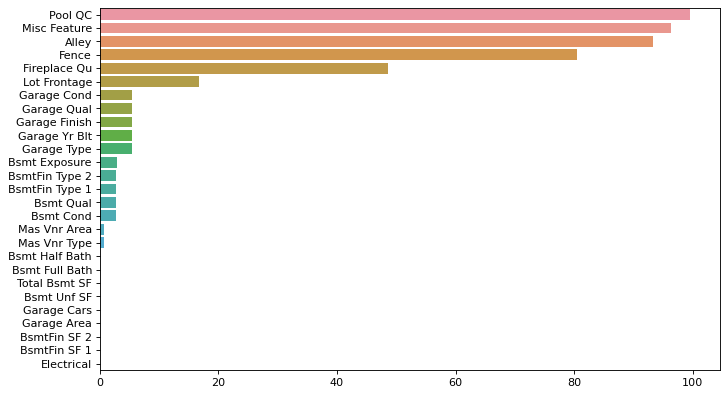

In [37]:
plt.figure(figsize=(10,6),dpi=80)
sns.barplot(y=percent_nan.index,x=percent_nan)

(0.0, 1.0)

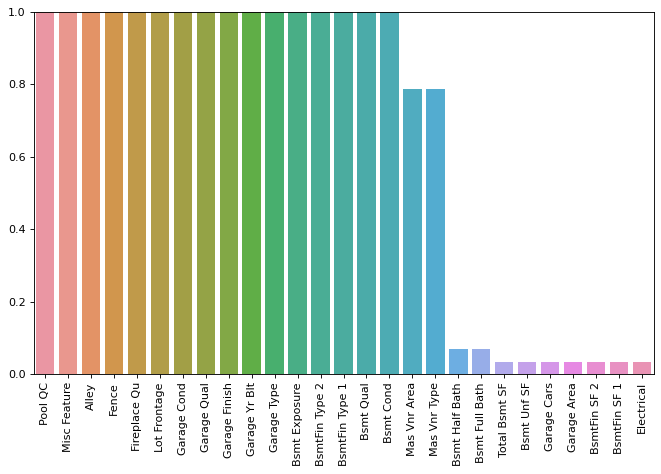

In [38]:
# Showing the missing values that represents less than 1% of Dataframe
plt.figure(figsize=(10,6),dpi=80)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)
plt.ylim(0,1)

In [39]:
percent_nan[percent_nan < 1]

Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
Bsmt Half Bath    0.068329
Bsmt Full Bath    0.068329
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
Garage Cars       0.034165
Garage Area       0.034165
BsmtFin SF 2      0.034165
BsmtFin SF 1      0.034165
Electrical        0.034165
dtype: float64

In [40]:
# Calculating the percentage that one row represents on Dataframe
# The result shows that 9 features have only one or two values missing
100 / len(df)

0.0341646737273659

In [41]:
df[df['Electrical'].isnull()]['Garage Area']

1577    400.0
Name: Garage Area, dtype: float64

In [42]:
# According to the descrption NA on basement features means the house don't have basement. 
# So the best decision is just fillna with another value
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [43]:
# Separating df as number and categorical features
df_Num = df.select_dtypes(include='number')
df_Cat = df.select_dtypes(include='object')

In [44]:
df_Cat.columns

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition'],
      dtype='object')

In [45]:
# Will be made 2 different operations. For Numeric columns and for string columns

# Numeric columns
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

# String Columns
bsmt_str_cols = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

In [46]:
df.dropna(axis=0,subset=['Electrical', 'Garage Area'], inplace = True)

(0.0, 1.0)

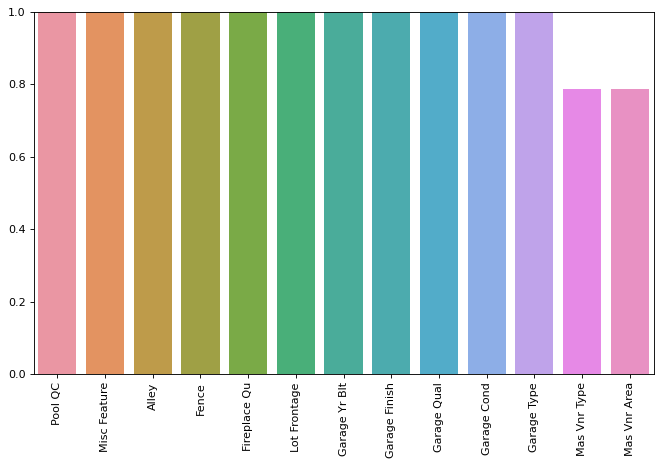

In [47]:
# Repeating the plot to see the difference
percent_nan = percent_missing(df)
plt.figure(figsize=(10,6),dpi=80)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)
plt.ylim(0,1)

In [48]:
# Filling missing data in the last 2 rows that have less than 1% missing values
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)

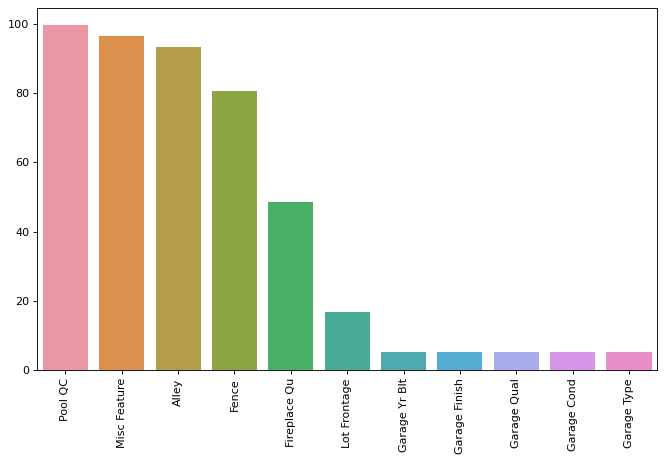

In [49]:
# Repeating the plot to see the difference
percent_nan = percent_missing(df)
plt.figure(figsize=(10,6),dpi=80)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [50]:
# Treating garage informations. On the description file we can that nan value in garage features means the house don't have garage
garage_str_col = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[garage_str_col] = df[garage_str_col].fillna('None')
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

In [51]:
# Dropping columns who have lot of missing information
df.drop(['Pool QC', 'Misc Feature', 'Alley', 'Fence'], axis=1, inplace=True)

In [52]:
# Replace missing value in the last 2 columns who still has missing data
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')

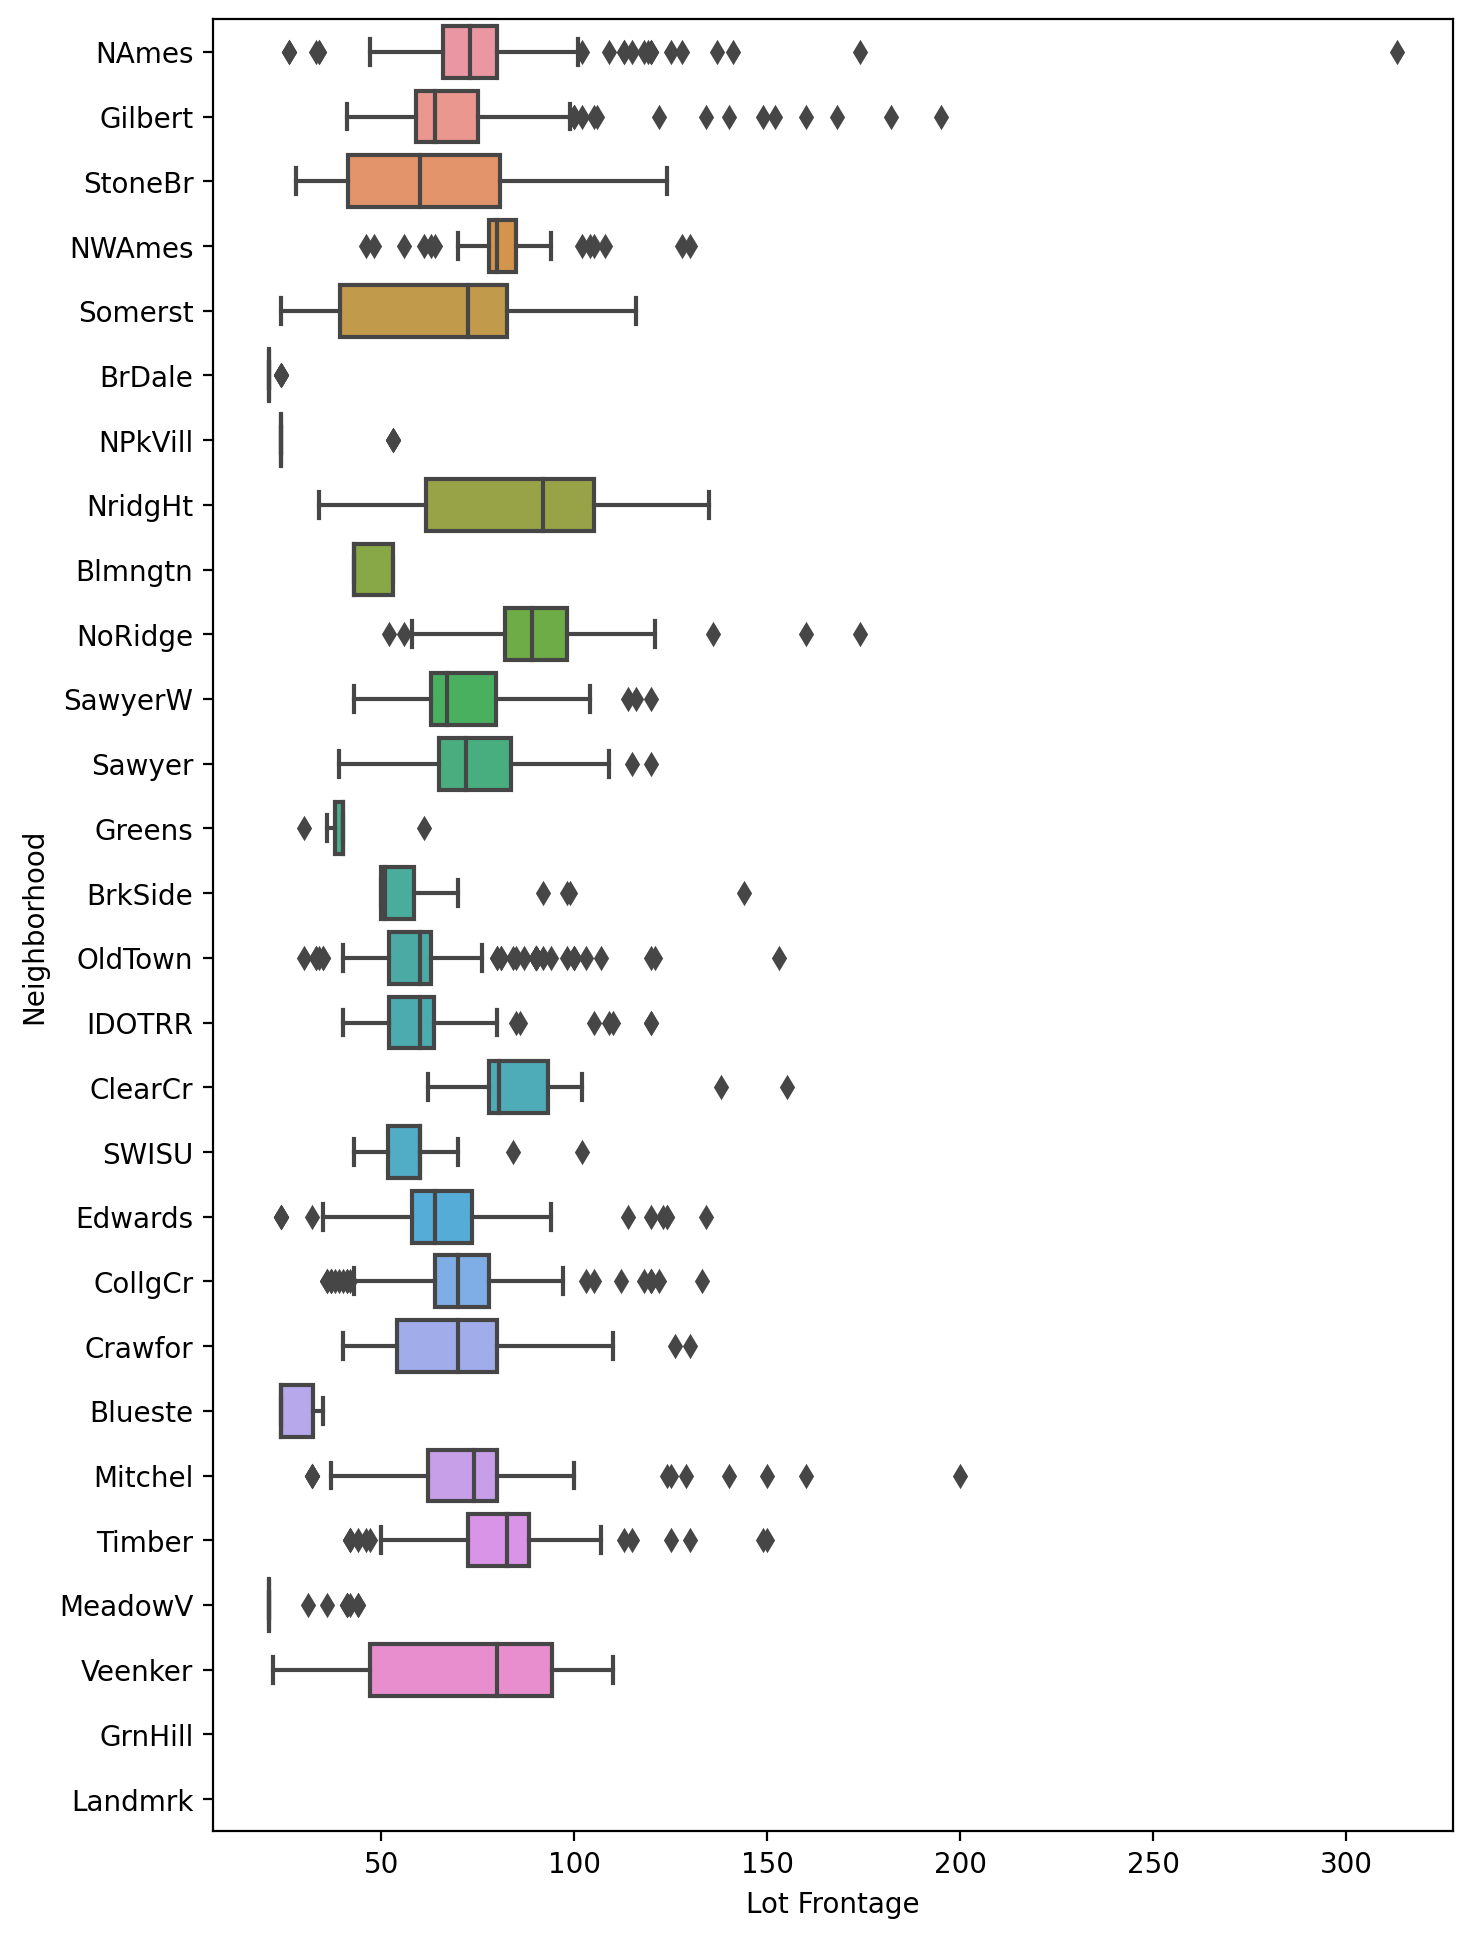

In [53]:
# Checking the behavior of the data at the last column who has missing data
# First let's read the description
#         LotFrontage: Linear feet of street connected to property

#         Neighborhood: Physical locations within Ames city limits

plt.figure(figsize=(8,12),dpi=200)
sns.boxplot(x='Lot Frontage', y='Neighborhood',data=df);

# We can see that the neighborhood mean is a good way to measure the LotFrontage missing values

In [54]:
# Assingning the mean value of the neighborhood to the missing values
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value: value.fillna(value.mean()))
df.isnull().sum().sort_values(ascending=False)

Lot Frontage    3
MS SubClass     0
Half Bath       0
Fireplace Qu    0
Fireplaces      0
               ..
Exter Qual      0
Mas Vnr Area    0
Mas Vnr Type    0
Exterior 2nd    0
SalePrice       0
Length: 76, dtype: int64

In [55]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)
df.isnull().sum().sort_values(ascending=False)

MS SubClass     0
Half Bath       0
Fireplace Qu    0
Fireplaces      0
Functional      0
               ..
Mas Vnr Area    0
Mas Vnr Type    0
Exterior 2nd    0
Exterior 1st    0
SalePrice       0
Length: 76, dtype: int64

In [56]:
# Transforming categorical feature that are assingned as integer 
df['MS SubClass'] = df['MS SubClass'].apply(str)

# Update categorical and numeric Dataframes
df_Cat = df.select_dtypes(include = 'object')
df_Num = df.select_dtypes(include = 'number')

# Creating a dummy dataframe
df_Dum = pd.get_dummies(df_Cat, drop_first=True)

# Joining the both DFs
df_Final = pd.concat([df_Num, df_Dum], axis=1)

In [57]:
df_Final

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.000000,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.000000,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.000000,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.000000,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.000000,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,37.000000,7937,6,6,1984,1984,0.0,819.0,0.0,184.0,...,0,0,0,0,1,0,0,0,1,0
2926,75.144444,8885,5,5,1983,1983,0.0,301.0,324.0,239.0,...,0,0,0,0,1,0,0,0,1,0
2927,62.000000,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,...,0,0,0,0,1,0,0,0,1,0
2928,77.000000,10010,5,5,1974,1975,0.0,1071.0,123.0,195.0,...,0,0,0,0,1,0,0,0,1,0


# Performing Machine Learning Model

## GridSearch Cross Validation

In [58]:
# Separate out the data into X features and y labels
X = df_Final.drop(columns='SalePrice',axis=1)
y = df_Final['SalePrice']

# Split up X and y into a training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

# Scaling the X and y df
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Creating a model estimator for Grid Search based on Elastic Net to decide about the best regressor
from sklearn.linear_model import ElasticNet
base_elastic_model = ElasticNet()

# Creating a param grid of values for the Elastic Net
param_grid = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

# Creating a Grid Search Model
from sklearn.model_selection import GridSearchCV
grid_model = GridSearchCV(estimator=base_elastic_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5)

# Fitting the model
grid_model.fit(X_train,y_train)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.394e+11, tolerance: 1.355e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.654e+11, tolerance: 1.308e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.324e+

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.559e+11, tolerance: 1.346e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.707e+11, tolerance: 1.355e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.869e+

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error')

In [59]:
# Display the best combination of parameters for the model
grid_model.best_params_

{'alpha': 100, 'l1_ratio': 1}

In [60]:
# Evaluating the model
y_pred = grid_model.predict(X_test)

# Showing the results
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(f'MAE: ${np.round(mean_absolute_error(y_test,y_pred),2)} dollars')
print(f'RMSE: ${np.round(mean_squared_error(y_test,y_pred,squared=False),2)} dollars')

MAE: $14195.35 dollars
RMSE: $20558.51 dollars
